In [86]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.pyplot as plt
data = pd.read_csv("../../standardized_datasets/2020-05-27_filtered_countries_julius_complete.csv", index_col=['country', 'date'])
data.drop(columns='cumulative_daily_change_total', inplace=True)
data.head()

confirmed  deaths  recovered  hdi_2018  \
country date                                                 
USA     2020-01-22        1.0     0.0        0.0      0.92   
        2020-01-23        1.0     0.0        0.0      0.92   
        2020-01-24        2.0     0.0        0.0      0.92   
        2020-01-25        2.0     0.0        0.0      0.92   
        2020-01-26        5.0     0.0        0.0      0.92   

                    population_total_2020  population_density_2020  \
country date                                                         
USA     2020-01-22             331002.647                   36.185   
        2020-01-23             331002.647                   36.185   
        2020-01-24             331002.647                   36.185   
        2020-01-25             331002.647                   36.185   
        2020-01-26             331002.647                   36.185   

                    cumulative_total  cumulative_total_per_thousand  retail  \
country date                                                                  
USA     2020-01-22               NaN                            NaN     NaN   
        2020-01-23               NaN                            NaN     NaN   
        2020-01-24               NaN                            NaN     NaN   
        2020-01-25               NaN                            NaN     NaN   
        2020-01-26               NaN                            NaN     NaN   

                    grocery and pharmacy  parks  transit stations  workplaces  \
country date                                                                    
USA     2020-01-22                   NaN    NaN               NaN         NaN   
        2020-01-23                   NaN    NaN               NaN         NaN   
        2020-01-24                   NaN    NaN               NaN         NaN   
        2020-01-25                   NaN    NaN               NaN         NaN   
        2020-01-26                   NaN    NaN               NaN         NaN   

                    residential  driving  transit  walking  pm2.5 value  
country date                                                             
USA     2020-01-22          NaN     3.01     1.06    -2.96          NaN  
        2020-01-23          NaN     7.90     3.29     0.83          NaN  
        2020-01-24          NaN    24.70    13.06    26.67          NaN  
        2020-01-25          NaN    20.92     1.88    39.61          NaN  
        2020-01-26          NaN   -12.68   -18.65   -10.10          NaN

In [87]:
tf.config.experimental.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [24]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [105]:
countries_of_interest = ['Germany', 'USA', 'Kenya']

In [110]:
df = data.loc[countries_of_interest].sort_values(by='date')
df.interpolate(inplace=True, limit_area=None)
df.loc['Germany']

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-01-13        NaN     NaN        NaN       NaN                    NaN   
2020-01-14        NaN     NaN        NaN       NaN                    NaN   
2020-01-15        NaN     NaN        NaN       NaN                    NaN   
2020-01-16        NaN     NaN        NaN       NaN                    NaN   
2020-01-17        NaN     NaN        NaN       NaN                    NaN   
...               ...     ...        ...       ...                    ...   
2020-05-22   179710.0  8228.0   159064.0     0.939              83783.945   
2020-05-23   179986.0  8261.0   159716.0     0.939              83783.945   
2020-05-24   180328.0  8283.0   160281.0     0.939              83783.945   
2020-05-25   180600.0  8309.0   161199.0     0.939              83783.945   
2020-05-26   181200.0  8372.0   161967.0     0.939              83783.945   

            population_density_2020  cumulative_total  \
date                                                    
2020-01-13                      NaN               NaN   
2020-01-14                      NaN               NaN   
2020-01-15                      NaN               NaN   
2020-01-16                      NaN               NaN   
2020-01-17                      NaN               NaN   
...                             ...               ...   
2020-05-22                  240.372           36918.0   
2020-05-23                  240.372           36918.0   
2020-05-24                  240.372           36918.0   
2020-05-25                  240.372           36918.0   
2020-05-26                  240.372           36918.0   

            cumulative_total_per_thousand  retail  grocery and pharmacy  \
date                                                                      
2020-01-13                            NaN     NaN                   NaN   
2020-01-14                            NaN     NaN                   NaN   
2020-01-15                            NaN     NaN                   NaN   
2020-01-16                            NaN     NaN                   NaN   
2020-01-17                            NaN     NaN                   NaN   
...                                   ...     ...                   ...   
2020-05-22                          0.687   -42.0                 -29.0   
2020-05-23                          0.687   -42.0                 -29.0   
2020-05-24                          0.687   -42.0                 -29.0   
2020-05-25                          0.687   -42.0                 -29.0   
2020-05-26                          0.687   -42.0                 -29.0   

            parks  transit stations  workplaces  residential  driving  \
date                                                                    
2020-01-13    NaN               NaN         NaN          NaN     0.00   
2020-01-14    NaN               NaN         NaN          NaN     1.31   
2020-01-15    NaN               NaN         NaN          NaN     2.82   
2020-01-16    NaN               NaN         NaN          NaN     4.61   
2020-01-17    NaN               NaN         NaN          NaN    14.38   
...           ...               ...         ...          ...      ...   
2020-05-22  -27.0             -38.0       -20.0         19.0   -14.15   
2020-05-23  -27.0             -38.0       -20.0         19.0   -14.15   
2020-05-24  -27.0             -38.0       -20.0         19.0   -14.15   
2020-05-25  -27.0             -38.0       -20.0         19.0   -14.15   
2020-05-26  -27.0             -38.0       -20.0         19.0   -14.15   

            transit  walking  pm2.5 value  
date                                       
2020-01-13     0.00     0.00          NaN  
2020-01-14     2.85     4.04          NaN  
2020-01-15     2.41     7.18          NaN  
2020-01-16     5.37    10.76          NaN  
2020-01-17    14.32    24.13          NaN  
...             ...      ...      

In [137]:
df_train = df.loc['Germany']
df_train = df_train.loc['2020-02-15':'2020-05-02']

df_train.reset_index(inplace=True)
df_train

date  confirmed  deaths  recovered  hdi_2018  population_total_2020  \
0   2020-02-15       16.0     0.0        1.0     0.939              83783.945   
1   2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2   2020-02-17       16.0     0.0        1.0     0.939              83783.945   
3   2020-02-18       16.0     0.0       12.0     0.939              83783.945   
4   2020-02-19       16.0     0.0       12.0     0.939              83783.945   
..         ...        ...     ...        ...       ...                    ...   
73  2020-04-28   159912.0  6314.0   117400.0     0.939              83783.945   
74  2020-04-29   161539.0  6467.0   120400.0     0.939              83783.945   
75  2020-04-30   163009.0  6623.0   123500.0     0.939              83783.945   
76  2020-05-01   164077.0  6736.0   126900.0     0.939              83783.945   
77  2020-05-02   164967.0  6812.0   129000.0     0.939              83783.945   

    population_density_2020  cumulative_total  cumulative_total_per_thousand  \
0                   240.372               NaN                            NaN   
1                   240.372               NaN                            NaN   
2                   240.372               NaN                            NaN   
3                   240.372               NaN                            NaN   
4                   240.372               NaN                            NaN   
..                      ...               ...                            ...   
73                  240.372        5694884.00                       17.20500   
74                  240.372        5968695.75                       18.03225   
75                  240.372        6140969.50                       18.55250   
76                  240.372        3286435.00                       10.08650   
77                  240.372        3413471.50                       10.48150   

    retail  grocery and pharmacy  parks  transit stations  workplaces  \
0      6.0                   1.0   45.0              10.0         0.0   
1      7.0                  10.0    9.0               6.0        -1.0   
2      2.0                   2.0    7.0               1.0        -2.0   
3      2.0                   2.0   10.0               1.0        -1.0   
4      3.0                   0.0    6.0              -1.0        -1.0   
..     ...                   ...    ...               ...         ...   
73   -48.0                 -10.0   19.0             -43.0       -33.0   
74   -46.0                   1.0   12.0             -43.0       -33.0   
75   -34.0                  19.0   -8.0             -39.0       -34.0   
76   -82.0                 -92.0   17.0             -67.0       -84.0   
77   -46.0                   3.0  -18.0             -42.0       -20.0   

    residential  driving  transit  walking  pm2.5 value  
0          -1.0    28.00    25.20    61.49         11.0  
1           0.0     9.63    14.91    -1.32         11.0  
2           0.0     8.00    57.64    11.55         11.0  
3           1.0     9.42    40.18    15.71         11.0  
4           1.0    10.81    32.15     9.61         11.0  
..          ...      ...      ...      ...          ...  
73         13.0   -30.96   -53.60   -40.19         11.0  
74         13.0   -29.39   -54.45   -40.96         11.0  
75         12.0   -29.70   -54.93   -39.92         11.0  
76         28.0   -37.54   -54.25   -40.71         11.0  
77          9.0   -34.09   -55.10   -40.74         11.0  

[78 rows x 19 columns]

In [312]:
X = df_train.drop(['confirmed', 'deaths', 'recovered'], axis=1)
y = pd.DataFrame(df_train['confirmed'])

# same df as X, only keep confirmed for comparison with test values
X_eval = df_train.drop(['deaths', 'recovered'], axis=1)
#X_test_eval['confirmed_pred'] = pd.Series()

#X = df.drop('confirmed', axis=1).values
#y = df['confirmed'].values
X_eval

date  confirmed  hdi_2018  population_total_2020  \
0   2020-02-15       16.0     0.939              83783.945   
1   2020-02-16       16.0     0.939              83783.945   
2   2020-02-17       16.0     0.939              83783.945   
3   2020-02-18       16.0     0.939              83783.945   
4   2020-02-19       16.0     0.939              83783.945   
..         ...        ...       ...                    ...   
73  2020-04-28   159912.0     0.939              83783.945   
74  2020-04-29   161539.0     0.939              83783.945   
75  2020-04-30   163009.0     0.939              83783.945   
76  2020-05-01   164077.0     0.939              83783.945   
77  2020-05-02   164967.0     0.939              83783.945   

    population_density_2020  cumulative_total  cumulative_total_per_thousand  \
0                   240.372               NaN                            NaN   
1                   240.372               NaN                            NaN   
2                   240.372               NaN                            NaN   
3                   240.372               NaN                            NaN   
4                   240.372               NaN                            NaN   
..                      ...               ...                            ...   
73                  240.372        5694884.00                       17.20500   
74                  240.372        5968695.75                       18.03225   
75                  240.372        6140969.50                       18.55250   
76                  240.372        3286435.00                       10.08650   
77                  240.372        3413471.50                       10.48150   

    retail  grocery and pharmacy  parks  transit stations  workplaces  \
0      6.0                   1.0   45.0              10.0         0.0   
1      7.0                  10.0    9.0               6.0        -1.0   
2      2.0                   2.0    7.0               1.0        -2.0   
3      2.0                   2.0   10.0               1.0        -1.0   
4      3.0                   0.0    6.0              -1.0        -1.0   
..     ...                   ...    ...               ...         ...   
73   -48.0                 -10.0   19.0             -43.0       -33.0   
74   -46.0                   1.0   12.0             -43.0       -33.0   
75   -34.0                  19.0   -8.0             -39.0       -34.0   
76   -82.0                 -92.0   17.0             -67.0       -84.0   
77   -46.0                   3.0  -18.0             -42.0       -20.0   

    residential  driving  transit  walking  pm2.5 value  
0          -1.0    28.00    25.20    61.49         11.0  
1           0.0     9.63    14.91    -1.32         11.0  
2           0.0     8.00    57.64    11.55         11.0  
3           1.0     9.42    40.18    15.71         11.0  
4           1.0    10.81    32.15     9.61         11.0  
..          ...      ...      ...      ...          ...  
73         13.0   -30.96   -53.60   -40.19         11.0  
74         13.0   -29.39   -54.45   -40.96         11.0  
75         12.0   -29.70   -54.93   -39.92         11.0  
76         28.0   -37.54   -54.25   -40.71         11.0  
77          9.0   -34.09   -55.10   -40.74         11.0  

[78 rows x 17 columns]

In [313]:
poi=['hdi_2018', 'population_total_2020','retail', 'parks', 'driving', 'workplaces' ]

In [315]:
X=X[poi]

In [316]:
X

hdi_2018  population_total_2020  retail  parks  driving  workplaces
0      0.939              83783.945     6.0   45.0    28.00         0.0
1      0.939              83783.945     7.0    9.0     9.63        -1.0
2      0.939              83783.945     2.0    7.0     8.00        -2.0
3      0.939              83783.945     2.0   10.0     9.42        -1.0
4      0.939              83783.945     3.0    6.0    10.81        -1.0
..       ...                    ...     ...    ...      ...         ...
73     0.939              83783.945   -48.0   19.0   -30.96       -33.0
74     0.939              83783.945   -46.0   12.0   -29.39       -33.0
75     0.939              83783.945   -34.0   -8.0   -29.70       -34.0
76     0.939              83783.945   -82.0   17.0   -37.54       -84.0
77     0.939              83783.945   -46.0  -18.0   -34.09       -20.0

[78 rows x 6 columns]

In [317]:
y = y['confirmed']

In [326]:
y.shape

(78, 1)

In [319]:
np.array(y)

array([1.60000e+01, 1.60000e+01, 1.60000e+01, 1.60000e+01, 1.60000e+01,
       1.60000e+01, 1.60000e+01, 1.60000e+01, 1.60000e+01, 1.60000e+01,
       1.70000e+01, 2.70000e+01, 4.60000e+01, 4.80000e+01, 7.90000e+01,
       1.30000e+02, 1.59000e+02, 1.96000e+02, 2.62000e+02, 4.82000e+02,
       6.70000e+02, 7.99000e+02, 1.04000e+03, 1.17600e+03, 1.45700e+03,
       1.90800e+03, 2.07800e+03, 3.67500e+03, 4.58500e+03, 5.79500e+03,
       7.27200e+03, 9.25700e+03, 1.23270e+04, 1.53200e+04, 1.98480e+04,
       2.22130e+04, 2.48730e+04, 2.90560e+04, 3.29860e+04, 3.73230e+04,
       4.39380e+04, 5.08710e+04, 5.76950e+04, 6.20950e+04, 6.68850e+04,
       7.18080e+04, 7.78720e+04, 8.47940e+04, 9.11590e+04, 9.60920e+04,
       1.00123e+05, 1.03374e+05, 1.07663e+05, 1.13296e+05, 1.18181e+05,
       1.22171e+05, 1.24908e+05, 1.27854e+05, 1.30072e+05, 1.31359e+05,
       1.34753e+05, 1.37698e+05, 1.41397e+05, 1.43342e+05, 1.45184e+05,
       1.47065e+05, 1.48291e+05, 1.50648e+05, 1.53129e+05, 1.549

In [340]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X= np.array(X).reshape(-1, 1) 
y= np.array(y).reshape(-1, 1)
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [341]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error

In [342]:
from sklearn.model_selection import TimeSeriesSplit


In [343]:
tscv = TimeSeriesSplit()

In [344]:
print(tscv)


TimeSeriesSplit(max_train_size=None, n_splits=5)


In [347]:
X.shape

(468, 1)

In [348]:
y.shape

(78, 1)

In [345]:
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77] TEST: [ 78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155]


IndexError: index 78 is out of bounds for axis 0 with size 78

In [346]:
regr = svm.SVR()

In [282]:
y= y.flatten()

In [283]:
regr.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

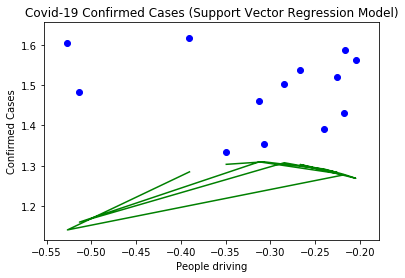

In [286]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regr.predict(X_test), color = 'green')
plt.title('Covid-19 Confirmed Cases (Support Vector Regression Model)')
plt.xlabel('People driving')
plt.ylabel('Confirmed Cases')
plt.show()